In [25]:
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import networkx as nx
import pandas 
import json, os
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()

In [2]:
def parse_graph(inpath, outpath, save = True):
    df = pandas.DataFrame(columns=['id1', 'id2'])
    with open(inpath, 'r') as f:
        line = f.readline()
        cnt = 1
        while line:
            df.loc[cnt] = line.strip().split("\t")
            line = f.readline()
            cnt += 1
    df['weight'] = 1
    if save:
        df.to_csv(os.path.join(outpath, 'data.csv'), index=False)
        train, test = train_test_split(df, train_size = 0.8)
        train.to_csv(os.path.join(outpath, 'train.csv'), index=False)
        test.to_csv(os.path.join(outpath, 'test.csv'), index=False)
    return df
    

In [7]:
df = parse_graph('resources/physics/CA-GrQc.txt', 
                 'resources/physics/')

In [9]:
len(df['id1'].unique())

5242

In [18]:
outpath = 'resources/physics/'
train, test = train_test_split(df, train_size = 0.8)
train.to_csv(os.path.join(outpath, 'train5.csv'), index=False)
test.to_csv(os.path.join(outpath, 'test5.csv'), index=False)

In [ ]:
python3 embed.py \
       -dim 2 \
       -lr 0.3 \
       -epochs 100 \
       -negs 10 \
       -burnin 20 \
       -ndproc 4 \
       -manifold poincare \
       -dset resources/physics/train.csv \
       -checkpoint results/physics/result.pth \
       -batchsize 10 \
       -eval_each 1 \
       -sparse \
       -train_threads 2
       -sym

python3 embed.py \
       -dim 2 \
       -lr 0.3 \
       -epochs 200 \
       -negs 50 \
       -burnin 20 \
       -ndproc 4 \
       -manifold euclidean \
       -dset resources/physics/train.csv \
       -checkpoint results/physics/result_eu.pth \
       -batchsize 10 \
       -eval_each 1 \
       -sparse \
       -train_threads 2
       -sym

In [ ]:
python3 link_pred.py \
       -dim 10 \
       -lr 0.3 \
       -epochs 100 \
       -negs 10 \
       -burnin 20 \
       -ndproc 4 \
       -manifold poincare \
       -dset resources/physics/data.csv \
       -batchsize 10 \
       -eval_each 20 \
       -sparse \
       -train_threads 2 \
       -sym

python3 link_pred.py \
       -dim 10 \
       -lr 0.3 \
       -epochs 100 \
       -negs 50 \
       -burnin 20 \
       -ndproc 4 \
       -manifold euclidean \
       -dset resources/physics/data.csv \
       -batchsize 10 \
       -eval_each 20 \
       -sparse \
       -train_threads 2 \
       -sym

In [90]:
from hype.euclidean import EuclideanManifold
from hype.poincare import PoincareManifold
from sklearn.metrics import average_precision_score

def link_prob(d, r, t):
    return 1/(np.exp((d-r)/t)+1) #eq. 7 in paper
              
def link_pred_map(obj, embedding, distfn, r=1, t=1):
    ap_list = []
    for i, node in tqdm(enumerate(obj)):
        dists = distfn(embedding[None, i], embedding).numpy()
        dists[i] = 1e12
        probs = [link_prob(d, r, t) for d in dists]
        y_true = get_y_true(obj, node, df)
        ap = average_precision_score(y_true, probs)
        ap_list.append(ap) #calculates average percision score
        print(ap)
    return np.mean(ap_list)
                
def get_y_true(obj, v, df): 
    y_pred = []
    v_edge_to = df[df['id1'] == v]['id2'].to_numpy()
    y_true = [1 if n in v_edge_to else 0 for n in obj]
    return y_true
    

In [83]:
937 in obj

True

In [89]:
937 in df[df['id1'] == 3466]['id2']

True

In [70]:
link_prob(4, 0.5, 1)

0.02931223075135632

In [17]:
chkpnt = torch.load('results/physics_first/result.pth.199', map_location='cpu')

embedding = chkpnt['embeddings']
obj = chkpnt['objects']

df = pandas.read_csv('resources/physics/data.csv')

In [26]:
from hype.poincare import PoincareManifold


In [ ]:
link_pred_map(obj, embedding, PoincareManifold().distance, 0.5, 1)





0it [00:00, ?it/s]/Users/sophiasun/miniconda2/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  




3it [00:00, 26.05it/s]

[  231  2741  2980  7014  7533  8612  9755 11175 12365 15003 15538 15552
 18910 21012 21027 21508 22937 23363 23481 24924 25189]
True
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0





6it [00:00, 25.40it/s]



9it [00:00, 25.88it/s]

True
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0





12it [00:00, 25.72it/s]



15it [00:00, 25.84it/s]

[ 8153 16728 22319 23424]
True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,





18it [00:00, 25.28it/s]



21it [00:00, 24.76it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 





24it [00:00, 25.16it/s]



27it [00:01, 25.84it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)





84it [00:03, 25.07it/s]



87it [00:03, 25.69it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 





90it [00:03, 25.50it/s]



93it [00:03, 25.59it/s]

True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0





96it [00:03, 25.38it/s]



99it [00:03, 25.47it/s]

[ 3909  3910  5993  8916  9188 21432 21491]
True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,





102it [00:04, 25.50it/s]



105it [00:04, 25.90it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)





108it [00:04, 25.71it/s]



111it [00:04, 26.11it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)





114it [00:04, 25.59it/s]



117it [00:04, 25.84it/s]

[4896]
True
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [2]:
from hype.graph import load_adjacency_matrix, load_edge_list, eval_reconstruction


In [123]:
def read_gml(inpath, outpath, attribute_name='value'):

    G = nx.read_gml(inpath)
    G = G.to_undirected()
    # get labels
    label_dic = nx.get_node_attributes(G, attribute_name)

    df = pandas.DataFrame(G.edges(), columns=['id1', 'id2'])
    df['weight'] = 1

    df.to_csv(os.path.join(outpath, 'data.csv'), index=False)
    with open(os.path.join(outpath, 'labels.json'), 'w') as f:
        json.dump(label_dic, f)

    return df, label_dic


In [78]:
read_gml("resources/polblogs/polblogs.gml", "resources/polblogs")

In [69]:
python3 embed.py \
       -dim 2 \
       -lr 0.3 \
       -epochs 200 \
       -negs 10 \
       -burnin 20 \
       -ndproc 4 \
       -manifold poincare \
       -dset resources/polbooks/data.csv \
       -checkpoint results/polbooks/result.pth \
       -batchsize 10 \
       -eval_each 1 \
       -sparse \
       -train_threads 2

python3 embed.py \
       -dim 2 \
       -lr 0.3 \
       -epochs 200 \
       -negs 50 \
       -burnin 20 \
       -ndproc 4 \
       -manifold euclidean \
       -dset resources/polbooks/data.csv \
       -checkpoint results/polbooks/result_eu.pth \
       -batchsize 10 \
       -eval_each 1 \
       -sparse \
       -train_threads 2

SyntaxError: invalid syntax (<ipython-input-69-6ea573ec5ff0>, line 1)

In [206]:
with open(os.path.join('resources/polblogs/labels.json'), 'r') as f:
    labels_dic = json.load(f)
data = pandas.read_csv("resources/polblogs/data.csv")

"\nindex = {obj[i]:i for i in range(len(obj))}\nct = 0\nfor i, edge in data.iterrows():\n    n1 = edge['id1']\n    c1 = lt_np[index[n1]]\n    n2 = edge['id2']\n    c2 = lt_np[index[n2]]\n    if np.linalg.norm(c1-c2)>1:\n        ct += 1\n        plt.plot([c1[0],c2[0]], [c1[1],c2[1]], 'k-', linewidth=0.5, alpha=0.2)\nprint(ct)\n\nmiddle = df[df.apply(lambda x: x['x']**2+ x['y']**2 <0.4, axis=1)]\nfor i, point in middle.iterrows():\n    ax.text(point['x']+.02, point['y'], str(point['name']))\n"

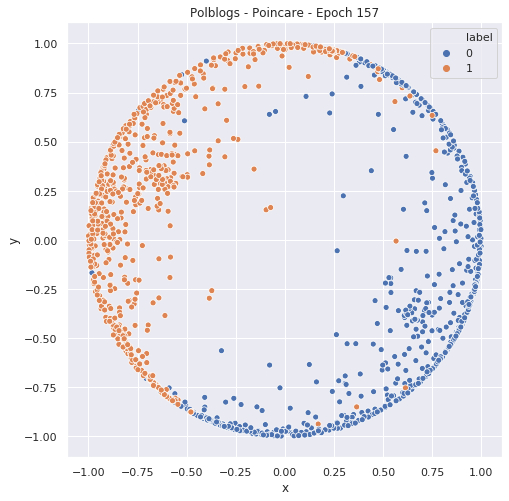

In [207]:
chkpnt = torch.load('results/polblogs/result.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt['objects']
epk = chkpnt['epoch']
labels = [labels_dic[o] for o in obj]
lt_np = lt.numpy()
df = pandas.DataFrame(lt_np, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('Polblogs - Poincare - Epoch %s'%epk)

'''
index = {obj[i]:i for i in range(len(obj))}
ct = 0
for i, edge in data.iterrows():
    n1 = edge['id1']
    c1 = lt_np[index[n1]]
    n2 = edge['id2']
    c2 = lt_np[index[n2]]
    if np.linalg.norm(c1-c2)>1:
        ct += 1
        plt.plot([c1[0],c2[0]], [c1[1],c2[1]], 'k-', linewidth=0.5, alpha=0.2)
print(ct)

middle = df[df.apply(lambda x: x['x']**2+ x['y']**2 <0.4, axis=1)]
for i, point in middle.iterrows():
    ax.text(point['x']+.02, point['y'], str(point['name']))
'''

In [ ]:
chkpnt = torch.load('results/polblogs/result.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [labels_dic[o] for o in obj]
lt_numpy = lt.numpy()
df = pandas.DataFrame(lt_numpy, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('Polblogs - Poincare - Epoch %s'%epk)

In [131]:
data.shape

(16783, 3)

"\nmiddle = df[df.apply(lambda x: x['x']**2+ x['y']**2 <0.4, axis=1)]\nfor i, point in middle.iterrows():\n    ax.text(point['x']+.02, point['y'], str(point['name']))\n"

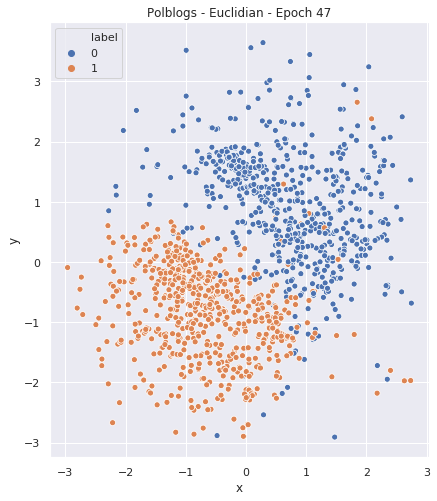

In [120]:
chkpnt = torch.load('results/polblogs/result_eu.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [labels_dic[o] for o in obj]
lt_numpy = lt.numpy()
df = pandas.DataFrame(lt_numpy, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('Polblogs - Euclidian - Epoch %s'%epk)


In [124]:
data, labels_dic = read_gml("resources/polbooks/polbooks.gml", "resources/polbooks")

In [ ]:
def exp():
    

0


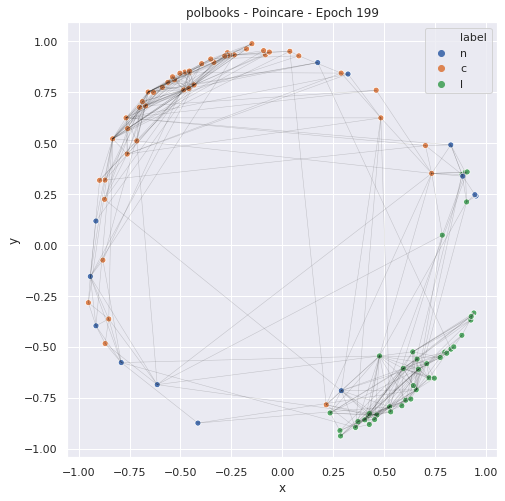

In [152]:
data, labels_dic = read_gml("resources/polbooks/polbooks.gml", 
                                "resources/polbooks")
    
    
chkpnt = torch.load('results/polbooks/result.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [labels_dic[o] for o in obj]
lt_np = lt.numpy()
df = pandas.DataFrame(lt_np, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('polbooks - Poincare - Epoch %s'%epk)

index = {obj[i]:i for i in range(len(obj))}
ct = 0
for i, edge in data.iterrows():
    n1 = edge['id1']
    c1 = lt_np[index[n1]]
    n2 = edge['id2']
    c2 = lt_np[index[n2]]
    #if np.linalg.norm(c1-c2)>0.1:
    #    ct += 1
    plt.plot([c1[0],c2[0]], [c1[1],c2[1]], 'k-', linewidth=0.5, alpha=0.2)
print(ct)


Text(0.5, 1.0, 'polbooks - Poincare - Epoch 199')

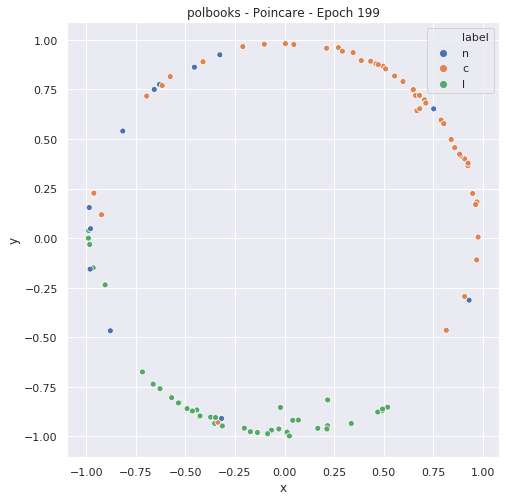

In [125]:
chkpnt = torch.load('results/polbooks/result.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [labels_dic[o] for o in obj]
lt_numpy = lt.numpy()
df = pandas.DataFrame(lt_numpy, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('polbooks - Poincare - Epoch %s'%epk)


0


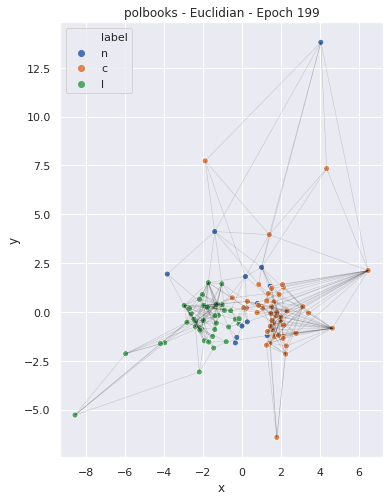

In [154]:
chkpnt = torch.load('results/polbooks/result_eu.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [labels_dic[o] for o in obj]
lt_np= lt.numpy()
df = pandas.DataFrame(lt_np, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('polbooks - Euclidian - Epoch %s'%epk)
'''
middle = df[df.apply(lambda x: x['x']**2+ x['y']**2 <0.4, axis=1)]
for i, point in middle.iterrows():
    ax.text(point['x']+.02, point['y'], str(point['name']))
'''

index = {obj[i]:i for i in range(len(obj))}
ct = 0
for i, edge in data.iterrows():
    n1 = edge['id1']
    c1 = lt_np[index[n1]]
    n2 = edge['id2']
    c2 = lt_np[index[n2]]
    #if np.linalg.norm(c1-c2)>0.1:
    #    ct += 1
    plt.plot([c1[0],c2[0]], [c1[1],c2[1]], 'k-', linewidth=0.5, alpha=0.2)
print(ct)


In [ ]:
labels = ["Case_Based", "Genetic_Algorithms", "Neural_Networks", 
    "Probabilistic_Methods", "Reinforcement_Learning",
    "Rule_Learning","Theory"]

In [199]:
def read_cora():
    links = []
    with open("resources/cora/cora.cites",'r') as f:
        line = f.readline()
        cnt = 1
        while line:
            links.append((line.strip().split("\t")))
            line = f.readline()
            cnt += 1
    print(cnt)
    df = pandas.DataFrame(links, columns=['id1', 'id2'])
    rev = df.copy().rename(columns={'id1' : 'id2', 'id2' : 'id1'})
    df = pandas.concat([df, rev])
    df['weight'] = 1
    df.to_csv(os.path.join("resources/cora", 'data.csv'), index=False)
    
    label_dic = {}

    with open("resources/cora/cora.content",'r') as f:
        line = f.readline()
        while line:
            info = line.strip().split("\t")
            label_dic[info[0]] = info[-1]
            line = f.readline()


    with open(os.path.join("resources/cora", 'labels.json'), 'w') as f:
        json.dump(label_dic, f)

    return df, label_dic

In [212]:
cora_df, cora_label = read_cora()

5430


/home/ss/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [ ]:
python3 embed.py \
       -dim 2 \
       -lr 0.3 \
       -epochs 200 \
       -negs 50 \
       -burnin 20 \
       -ndproc 4 \
       -manifold poincare \
       -dset resources/cora/data.csv \
       -checkpoint results/cora/result.pth \
       -batchsize 10 \
       -eval_each 1 \
       -sparse \
       -train_threads 2

python3 embed.py \
       -dim 2 \
       -lr 0.3 \
       -epochs 200 \
       -negs 50 \
       -burnin 20 \
       -ndproc 4 \
       -manifold euclidean \
       -dset resources/cora/data.csv \
       -checkpoint results/cora/result_eu.pth \
       -batchsize 10 \
       -eval_each 1 \
       -sparse \
       -train_threads 2

In [192]:
list(set(labels))

[0, 1, 2, 3, 4, 5, 6]

In [197]:
df.label.unique()

array([1, 2, 6, 4, 0, 3, 5])

In [216]:
len(obj)

2708

Text(0.5, 1.0, 'Cora - Poincare - Epoch 198')

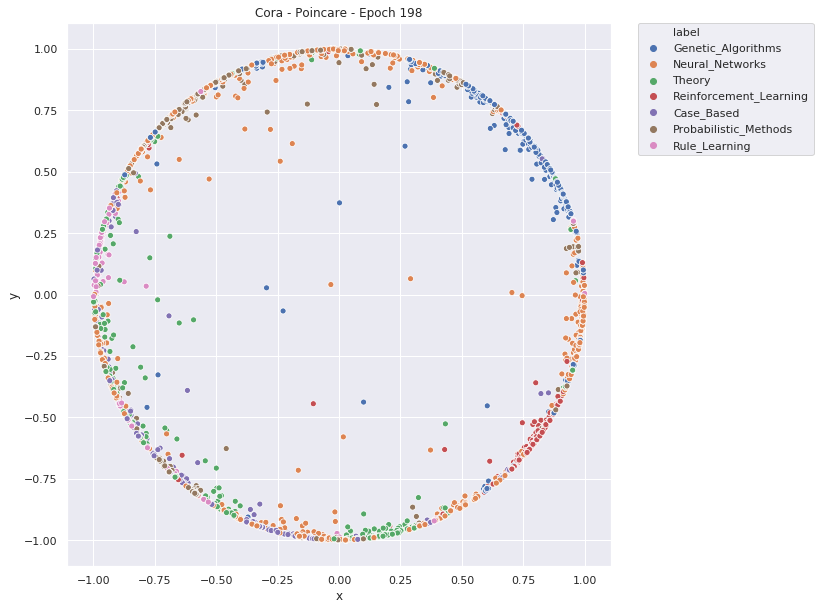

In [215]:
chkpnt = torch.load('results/cora/result.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [cora_label[str(o)] for o in obj]
lt_numpy = lt.numpy()
df = pandas.DataFrame(lt_numpy, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_aspect('equal')
ax.set_title('Cora - Poincare - Epoch %s'%epk)


KeyError: '100monkeystyping.com'

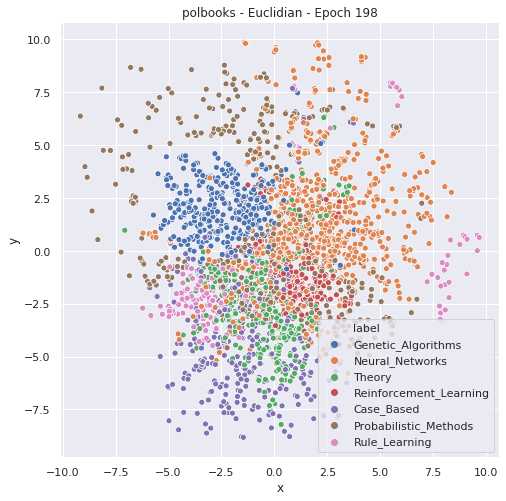

In [214]:
chkpnt = torch.load('results/cora/result_eu.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [cora_label[str(o)] for o in obj]
lt_np= lt.numpy()
df = pandas.DataFrame(lt_np, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('polbooks - Euclidian - Epoch %s'%epk)
'''
middle = df[df.apply(lambda x: x['x']**2+ x['y']**2 <0.4, axis=1)]
for i, point in middle.iterrows():
    ax.text(point['x']+.02, point['y'], str(point['name']))
'''

index = {obj[i]:i for i in range(len(obj))}
ct = 0
for i, edge in data.iterrows():
    n1 = edge['id1']
    c1 = lt_np[index[n1]]
    n2 = edge['id2']
    c2 = lt_np[index[n2]]
    #if np.linalg.norm(c1-c2)>0.1:
    #    ct += 1
    plt.plot([c1[0],c2[0]], [c1[1],c2[1]], 'k-', linewidth=0.5, alpha=0.2)
print(ct)


In [3]:
chkpnt = torch.load('results/mammals.pth', map_location='cpu')
lt = chkpnt['embeddings']

In [5]:
lt.shape

torch.Size([1180, 5])

In [7]:
lt_np = lt.numpy()

In [10]:
lt_2d = lt_np[:,:2]

In [11]:
print(lt_2d[0])

[-0.47410328  0.69495815]


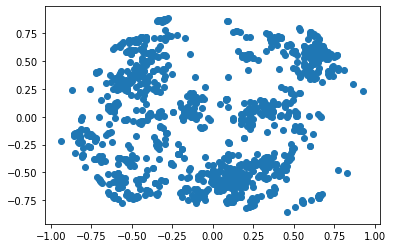

In [14]:
plt.scatter(lt_2d[:,0], lt_2d[:,1])

In [15]:
chkpnt = torch.load('results/2d/mammals.pth', map_location='cpu')
lt = chkpnt['embeddings']

In [43]:
chkpnt.keys()

dict_keys(['conf', 'objects', 'model', 'embeddings', 'epoch', 'manifold'])

In [44]:
chkpnt["objects"]

['rhodesian_man.n.01',
 'primate.n.02',
 'stoat.n.01',
 'placental.n.01',
 'hind.n.02',
 'deer.n.01',
 'fissipedia.n.01',
 'mammal.n.01',
 'virginia_deer.n.01',
 'ruminant.n.01',
 'bottle-nosed_whale.n.01',
 'toothed_whale.n.01',
 'bushbuck.n.01',
 'western_lowland_gorilla.n.01',
 'leopard.n.02',
 'big_cat.n.01',
 'western_big-eared_bat.n.01',
 'carnivorous_bat.n.01',
 'lionet.n.01',
 'feline.n.01',
 'stag.n.02',
 'buck.n.05',
 'fawn.n.02',
 'manx.n.02',
 'domestic_cat.n.01',
 'australopithecus_boisei.n.01',
 'rat_terrier.n.01',
 'northern_flying_squirrel.n.01',
 'rodent.n.01',
 'irish_wolfhound.n.01',
 'hunting_dog.n.01',
 'eared_seal.n.01',
 'aquatic_mammal.n.01',
 'giant_eland.n.01',
 'mouse-eared_bat.n.01',
 'woodland_caribou.n.01',
 'galloway.n.02',
 'bovine.n.01',
 'mandrill.n.01',
 'eland.n.01',
 'gopher.n.04',
 'bezoar_goat.n.01',
 'welsh.n.03',
 'sporting_dog.n.01',
 'canine.n.02',
 'old_world_buffalo.n.01',
 'mountain_chinchilla.n.01',
 'wild_dog.n.01',
 'common_raccoon.n.01'

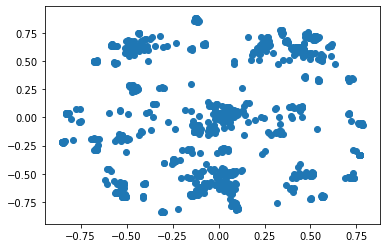

In [16]:
lt_np = lt.numpy()
plt.scatter(lt_np[:,0], lt_np[:,1])

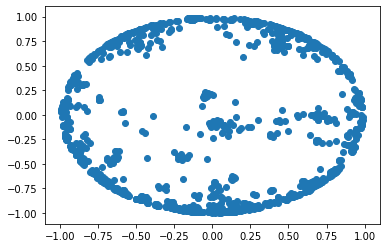

In [29]:
chkpnt = torch.load('results/2d/mammals.pth', map_location='cpu')
lt = chkpnt['embeddings']
lt_np = lt.numpy()
plt.scatter(lt_np[:,0], lt_np[:,1])

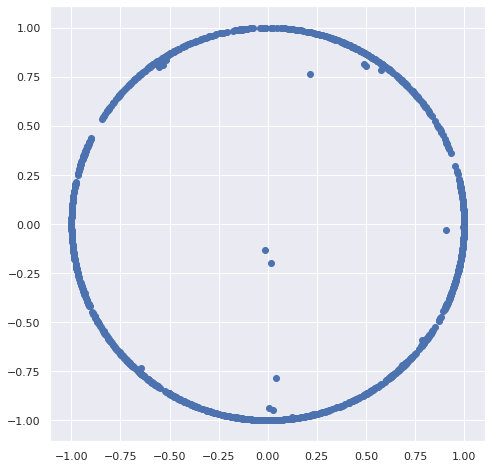

In [39]:
chkpnt = torch.load('results/2d/mammals.pth', map_location='cpu')
lt = chkpnt['embeddings']
lt_np = lt.numpy()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(lt_np[:,0], lt_np[:,1])
ax.set_aspect('equal')


In [4]:
meanrank, maprank = eval_reconstruction(adj, lt, manifold.distance)


NameError: name 'adj' is not defined